# This notebook will teach you how to do some basic Exploratory Data Analysis in Python

To do so, we will use these Kaggle datasets on Medals and Athletes of the Tokyo Olympics 2021:

- https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo?select=Medals.xlsx
- https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo?select=Athletes.xlsx

After downloading these files, make sure to store them in the `data/external/` folder, as it will be read from there.

In case of running intro troubble downloading these files, make sure to have a Kaggle account and have it logged in.

# Part I: Numerical variables

Next, moving on, let's read the dataframe using the `read_excel` function:

In [1]:
from pandas import read_excel

In [2]:
df_medals = read_excel('data/external/Medals.xlsx')

Now that we have the dataframe stored in the variable `df_medals` we can use the many functionalities `DataFrame` offers.

In [3]:
df_medals.head() # This shows the top 5 rows of our dataframe

Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0     1    United States of America    39      41      33    113   
1     2  People's Republic of China    38      32      18     88   
2     3                       Japan    27      14      17     58   
3     4               Great Britain    22      21      22     65   
4     5                         ROC    20      28      23     71   

   Rank by Total  
0              1  
1              2  
2              5  
3              4  
4              3

In [4]:
df_medals.dtypes # This shows the datatypes of our variables

Rank              int64
Team/NOC         object
Gold              int64
Silver            int64
Bronze            int64
Total             int64
Rank by Total     int64
dtype: object

In [5]:
df_medals.describe() # This describes the numeric variables in dataset

Rank       Gold     Silver     Bronze       Total  Rank by Total
count  93.000000  93.000000  93.000000  93.000000   93.000000      93.000000
mean   46.333333   3.655914   3.634409   4.322581   11.612903      43.494624
std    26.219116   7.022471   6.626339   6.210372   19.091332      24.171769
min     1.000000   0.000000   0.000000   0.000000    1.000000       1.000000
25%    24.000000   0.000000   0.000000   1.000000    2.000000      23.000000
50%    46.000000   1.000000   1.000000   2.000000    4.000000      47.000000
75%    70.000000   3.000000   4.000000   5.000000   11.000000      66.000000
max    86.000000  39.000000  41.000000  33.000000  113.000000      77.000000

In [6]:
df_medals.describe(include=['O']) # This describes the Object or string variables in our dataframe

Team/NOC
count        93
unique       93
top     Bahamas
freq          1

### Now that we have basic information on how our DataFrame looks like, it's time for plotting:

In [7]:
# first we need to import the Matplotlib package. Since we will use so many function from it, 
# we usually import it the following way:

import matplotlib.pyplot as plt

Now we want to create a plot. First the plt.subplots() offers a figure and an axis.
Then, we can set different parameters. Let's start with the parameter figsize(X, Y), which sets the height and width of our figure:

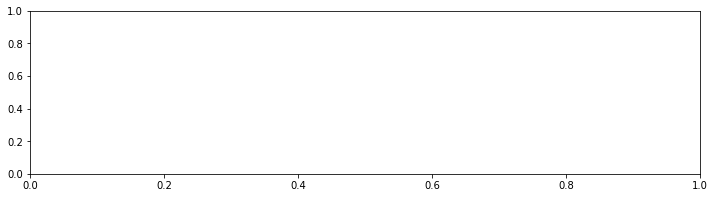

In [8]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.show()

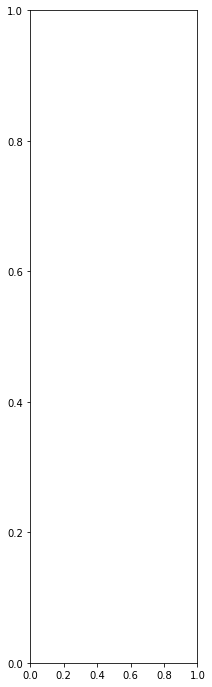

In [9]:
fig, ax = plt.subplots(figsize=(3, 12))

Try experimenting with different heights and widths:

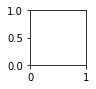

In [10]:
fig, ax = plt.subplots(figsize=(1, 1))

## Moving to histograms

Now we want to observe the distribution of different medals to see how many medals did countries get. To do so, we can use the `plt.hist()` function. We just need to set the number of bins accordingly. The parameter `bins` inside the `plt.hist()` function will set the number of bins to use.

We can also add the `plt.grid()` function such that we have references, `plt.xlim()` for setting the X-axis limits, and lastly we will set a title using `plt.title()`.

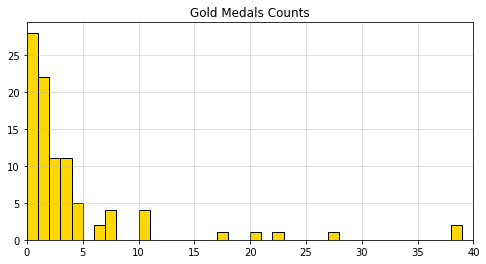

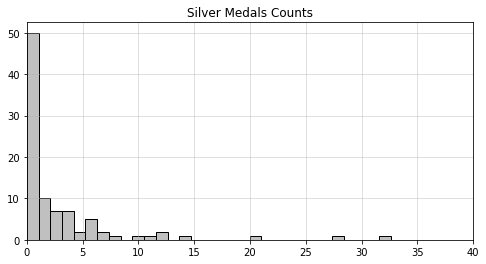

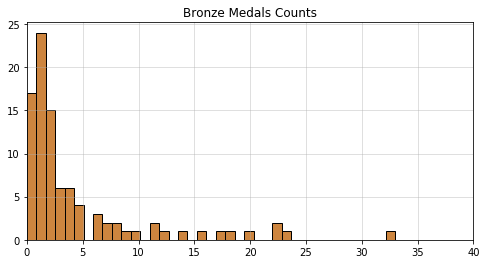

In [15]:
fig1, ax = plt.subplots(figsize=(8, 4))
plt.hist(df_medals.Gold, bins=39, edgecolor='k', color='gold')
plt.grid(True, alpha=.5)
plt.xlim([0, 40])
plt.title('Gold Medals Counts')
plt.show()

fig2, ax = plt.subplots(figsize=(8, 4))
plt.hist(df_medals.Silver, bins=39, edgecolor='k', color='silver')
plt.grid(True, alpha=.5)
plt.xlim([0, 40])
plt.title('Silver Medals Counts')
plt.show()

fig3, ax = plt.subplots(figsize=(8, 4))
plt.hist(df_medals.Bronze, bins=39, edgecolor='k', color='peru')
plt.grid(True, alpha=.5)
plt.xlim([0, 40])
plt.title('Bronze Medals Counts')
plt.show()

If we want to store the above plots, these need to be stored separately as:

In [16]:
fig1.savefig('results/2_Plot_medals_gold.png')
fig2.savefig('results/2_Plot_medals_silver.png')
fig3.savefig('results/2_Plot_medals_bronze.png')

As you may have noticed, the above cell runs 3 different plots, one for each medal. That's one way to do it, but what if we want to do many more plots at the same time, do we need to every time creat a new figure and axis?

That's when `plt.subplots()` comes in handy. The parameters `nrows` and `ncols` sets the number of columns and rows. For example, now we want to create a plot with three rows, the following will do the job:

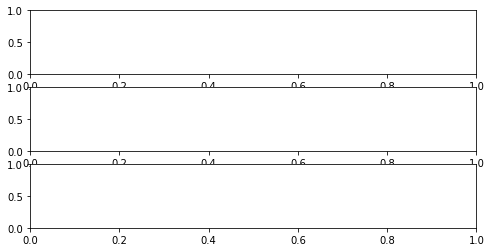

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 4))
plt.show()

But the x-ticks seem to be overlapping! Then `plt.tight_layout()` comes in handy:

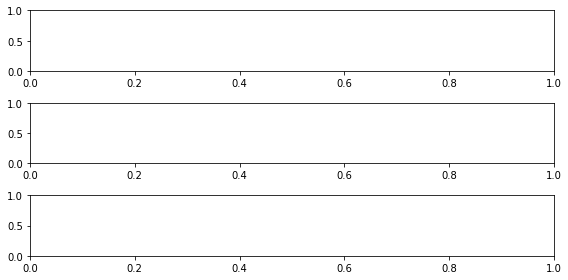

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 4))
plt.tight_layout()
plt.show()

But now, how do we reference each of the plots? Now  the variable `ax` is no longer a single axis, but a list of axes! We can reference each subplot using the typical list referencing in Python, e.g. `ax[0]`. Also notice that now the functions are called differently. In the above plot we used the `plt.xlim()` or `plt.title()` functions, but now these are called directly from the axis, e.g. `ax[0].set_title()` and the names of the functions are slightly different. Here you can find more information on this: https://matplotlib.org/stable/api/axes_api.html

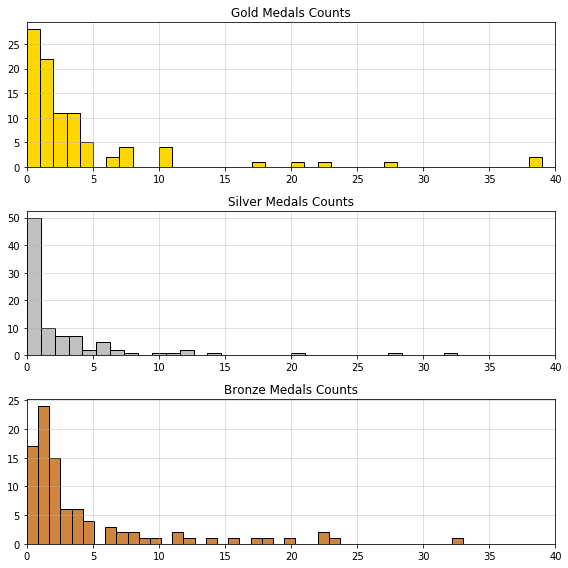

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
ax[0].hist(df_medals.Gold, bins=39, edgecolor='k', color='gold')
ax[0].grid(True, alpha=.5)
ax[0].set_xlim([0, 40])
ax[0].set_title('Gold Medals Counts')
ax[1].hist(df_medals.Silver, bins=39, edgecolor='k', color='silver')
ax[1].grid(True, alpha=.5)
ax[1].set_xlim([0, 40])
ax[1].set_title('Silver Medals Counts')
ax[2].hist(df_medals.Bronze, bins=39, edgecolor='k', color='peru')
ax[2].grid(True, alpha=.5)
ax[2].set_xlim([0, 40])
ax[2].set_title('Bronze Medals Counts')
plt.tight_layout()
plt.show()

Now we can save the three plots at the same time using `plt.savefig()` function!

In [20]:
fig.savefig('results/2_Plot_medals.png')

What if we want to do the horizontally? Then the number of rows will be 1, and the number of columns will be 3.

We can also set the number of bins equal to the maximum number corresponding to each plot, such that we have 1 bin per value. Otherwise the number of values per bin is set to the default value of of the matplotlib parameters `:rc:hist.bins`.

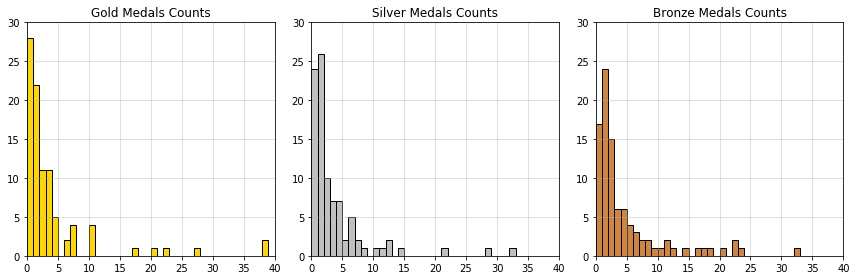

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].hist(df_medals.Gold, 
           bins=df_medals.Gold.max(), edgecolor='k', color='gold')
ax[0].grid(True, alpha=.5)
ax[0].set_xlim([0, 40])
ax[0].set_ylim([0, 30])
ax[0].set_title('Gold Medals Counts')
ax[1].hist(df_medals.Silver, bins=df_medals.Silver.max(),
           edgecolor='k', color='silver')
ax[1].grid(True, alpha=.5)
ax[1].set_xlim([0, 40])
ax[1].set_ylim([0, 30])
ax[1].set_title('Silver Medals Counts')
ax[2].hist(df_medals.Bronze, bins=df_medals.Bronze.max(), edgecolor='k', color='peru')
ax[2].grid(True, alpha=.5)
ax[2].set_xlim([0, 40])
ax[2].set_ylim([0, 30])
ax[2].set_title('Bronze Medals Counts')
plt.tight_layout()
plt.show()

### Now let's make a simple scatter plot of different variables

(https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html)

Scatterplots plot quantitative variables against each other on the Y and X-axis. They are good to explore correlations and distributions of variables.

Here we plot the number of Gold medals by country against the Total number of medals obtained by each country. We set the name of the X-axis and Y-axis with the function `plt.xlabel()` and `plt.label()` respectively.

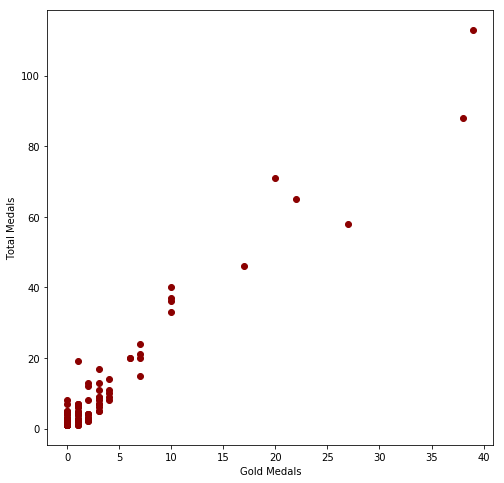

In [22]:
fig, ax = plt.subplots(figsize=(8, 8)) 
plt.scatter(df_medals.Gold, 
            df_medals.Total,
            color='darkred')
plt.xlabel('Gold Medals')
plt.ylabel('Total Medals')
plt.show()

Now that we have the basics, we can further improve the above plot to make it more readable. 

The most important thing to understand from Matplotlib is that each function called adds a new layer or piece of information to our plot. For example, now we want to add a `grid()`, using the `plt.grid(True)` function, but with a little bit of transparency, thus we want to pass the parameter `alpha=.5`.
Modifying the aspect ratio can also be useful to improve the readability of the plot.
We also want to add an X-axis limit, with the function `plt.xlim([x_min, x_max])`. We want to add a bit of extra space such that dots are not cut. Same for Y-axis. Lastly, we want to add the correct X- and Y- labels.

The following cell does this:

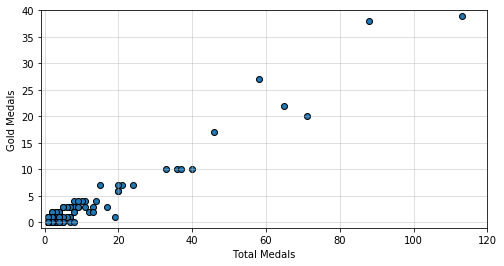

In [25]:
fig, ax = plt.subplots(figsize=(8, 4)) 
plt.scatter(df_medals.Total, 
            df_medals.Gold,
            edgecolor='k')
plt.grid(True,
         alpha=.5)
plt.ylim([-1, 40])
plt.xlim([-1, 120])
plt.ylabel('Gold Medals')
plt.xlabel('Total Medals')
plt.show()

## Exercise 1:

Create a scatterplot with the variables Silver (X-axis) and Bronze (Y-axis), with an aspect ratio adjusted to the number of medals in each axis, and with the correct labels set.

------

# Part II: Correlation matrix

Moving on, correlation seems large, so we want to explore it further. To obtain the correlation from numeric variables we can use the function `df.corr()` from the Pandas DataFrame object.

In [26]:
df_medals.corr()

Rank      Gold    Silver    Bronze     Total  Rank by Total
Rank           1.000000 -0.655477 -0.597835 -0.637166 -0.655877       0.873539
Gold          -0.655477  1.000000  0.929046  0.862425  0.970840      -0.626012
Silver        -0.597835  0.929046  1.000000  0.862646  0.969439      -0.632831
Bronze        -0.637166  0.862425  0.862646  1.000000  0.941941      -0.745573
Total         -0.655877  0.970840  0.969439  0.941941  1.000000      -0.692450
Rank by Total  0.873539 -0.626012 -0.632831 -0.745573 -0.692450       1.000000

Next, if we want to plot this matrix of values, we can use the `plt.imshow()` function (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

Let's use the above code and expand it further.

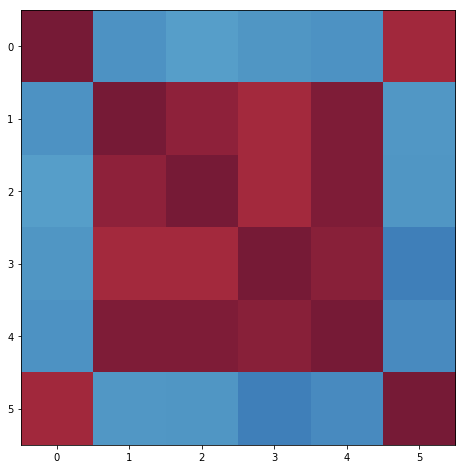

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(df_medals.corr(), cmap='RdBu_r', alpha=.9, vmax=1, vmin=-1)
plt.show()

This figure is not really informative, how can we improve it?

We can create a `plt.imshow()` figure of the correlations, using the colormap 'RdBu_r', using a transparency of .9 (`alpha=.9`), with the parameters `vmin=-1` and `vmax=1`, setting the minimum and maximum values for the colors. Next, we want to add the corresponing x-ticks and y-ticks, such that we know which variables reference to each rows/columns:

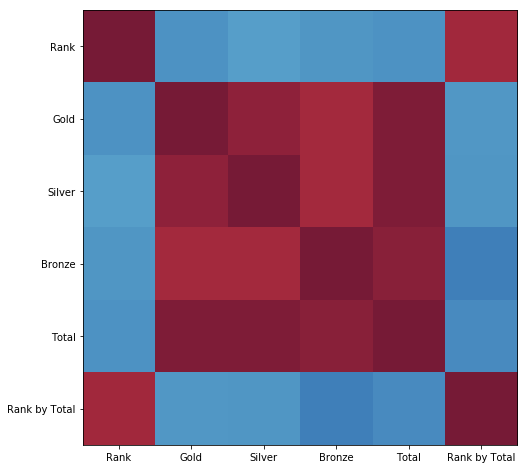

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(df_medals.corr(), cmap='RdBu_r', alpha=.9, vmax=1, vmin=-1)
plt.xticks(range(len(df_medals.corr().columns)), # positions on the X-Axis
           df_medals.corr().columns) # labels for the X-axis ticks
plt.yticks(range(len(df_medals.corr().columns)), # positions on the Y-Axis
           df_medals.corr().columns) # labels for the Y-axis ticks
plt.show()

This plot can be further improven. What if we add a colorbar?

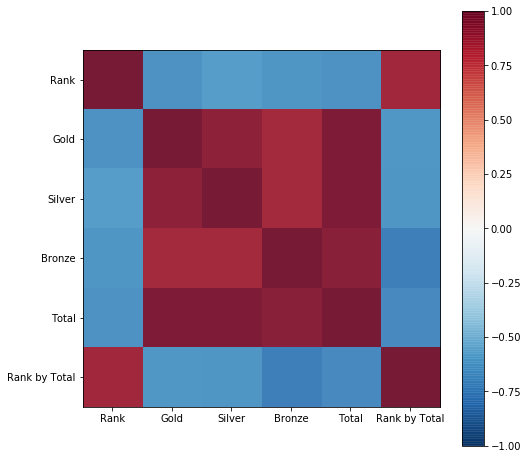

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(df_medals.corr(), cmap='RdBu_r', alpha=.9, vmax=1, vmin=-1)
plt.xticks(range(len(df_medals.corr().columns)), df_medals.corr().columns)
plt.yticks(range(len(df_medals.corr().columns)), df_medals.corr().columns)
plt.colorbar()
plt.show()

Good! Now we have the scale! But this plot still doesn't give precise information on the scales of the correlations. What if we now add text inside each of the boxes?

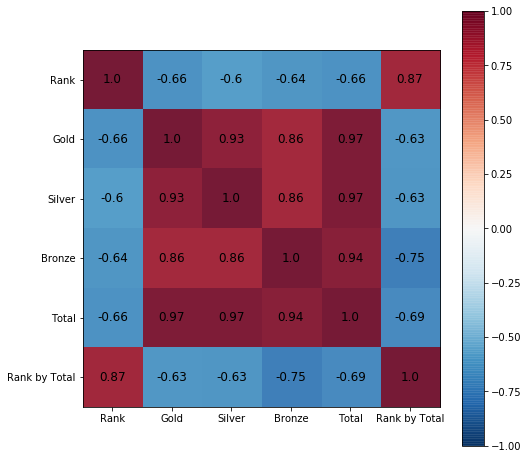

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(df_medals.corr(), cmap='RdBu_r', alpha=.9, vmax=1, vmin=-1)
plt.xticks(range(len(df_medals.corr().columns)), df_medals.corr().columns)
plt.yticks(range(len(df_medals.corr().columns)), df_medals.corr().columns)
plt.colorbar()

# Loop over data dimensions and create text annotations.
for i in range(len(df_medals.corr())):
    for j in range(len(df_medals.corr())):
        text = ax.text(j, i, round(df_medals.corr().iloc[i, j], 2),
                       ha="center", va="center", color="k", fontsize=12)
        
plt.show()

Great! Now we have the plot of correlations that we wanted. We have used a diverging colormap, such that the 0 is white, and red values indicate large correlations, whereas blue colors indicate negative correlations!

# Exercise 2: 

Now we have the correlation matrix plotted, can you delete the upper diagonal of the matrix? Check out this link for help! https://numpy.org/doc/stable/reference/generated/numpy.triu.html

In [30]:
from numpy import triu


# Part III:

Great! Now that we have control over subplots, histograms and matrix plolts let's move to boxplots!

The function `plt.boxplot()` makes quick boxplots! 

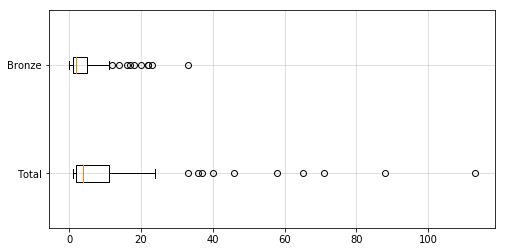

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.boxplot([df_medals.Total, df_medals.Bronze], vert=False)
plt.grid(True, alpha=.5)
plt.yticks(range(1, 3), ['Total', 'Bronze'])
plt.show()

Boxplots are another way to show distributions. Let's move to an exercise:

# Exercise 3:

Can you create a figure with 3 boxplots, with the variables "Gold", "Silver", and "Bronze", with the yticks set to the correct names, and with a grid with the parameter `alpha=.5`? 

# Part IV: Categorical variables & Barcharts

Now we will load another dataset with categorical variables. We will do the same standard procedure as with the other dataframe:

- Load it using `read_excel`
- Check datatypes
- Use the describe() method
- Get a sample (instead of head(), now we use sample() to get random rows)


In [32]:
df_athletes = read_excel('data/external/Athletes.xlsx')

In [33]:
df_athletes.dtypes

Name          object
NOC           object
Discipline    object
dtype: object

In [34]:
df_athletes.describe()

Name                       NOC Discipline
count                   11085                     11085      11085
unique                  11062                       206         46
top     van ROUWENDAAL Sharon  United States of America  Athletics
freq                        2                       615       2068

In [35]:
df_athletes.sample(5)

Name                       NOC             Discipline
10931    ZALANKI Gergo                   Hungary             Water Polo
6104      MASLAK Pavel            Czech Republic              Athletics
2922   FLEMING Deborah             Great Britain           Rugby Sevens
2147       DAVOUDI Ali  Islamic Republic of Iran          Weightlifting
4106         HUCK Erin  United States of America  Cycling Mountain Bike

Now with this variables we cannot check the correlation between variables.

One thing we can do is to groupby country ('NOC'), and make counts, to observe how many participants does each Country have. We can do this the following way:

In [36]:
df_athletes.groupby('NOC').count().sort_values('Discipline')['Name'].sort_values(ascending=False)

NOC
United States of America      615
Japan                         586
Australia                     470
People's Republic of China    401
Germany                       400
                             ... 
Mauritania                      2
Marshall Islands                2
Central African Republic        2
Somalia                         2
Dominica                        2
Name: Name, Length: 206, dtype: int64

Now we select the first twenty rows:

In [37]:
df_athletes.groupby('NOC').count().sort_values('Discipline')['Name'].sort_values(ascending=False)[:20]

NOC
United States of America      615
Japan                         586
Australia                     470
People's Republic of China    401
Germany                       400
France                        377
Canada                        368
Great Britain                 366
Italy                         356
Spain                         324
ROC                           318
Brazil                        291
Netherlands                   274
Republic of Korea             223
New Zealand                   202
Poland                        195
Argentina                     180
South Africa                  171
Hungary                       155
Mexico                        155
Name: Name, dtype: int64

And we make a simple barchart. Barcharts are commonly used for categorical variables and are very good to display rankings when they are ordered. In this graph, we have first sorted the values obtained from the count, and then we can plot them. See below:

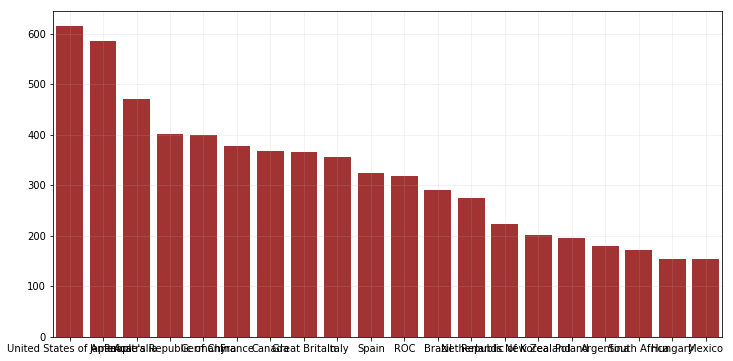

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_athletes.groupby('NOC').count().sort_values('Discipline')['Name'].sort_values(ascending=False)[:20].index,
            df_athletes.groupby('NOC').count().sort_values('Discipline')['Name'].sort_values(ascending=False)[:20],
        color='darkred', alpha=.8
        )
plt.xlim([-.5, 19.5])
plt.grid(True, alpha=.2)
plt.show()

As you can see, the xticks are overlapping and cannot be read. Thus, we need to rotate them. To do so, we use the `plt.xticks()` function with the parameter `rotation=90`. Remember that the first argument of `plt.xticks()` sets the position and the second one the text.

Here is some help on plt.xticks: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

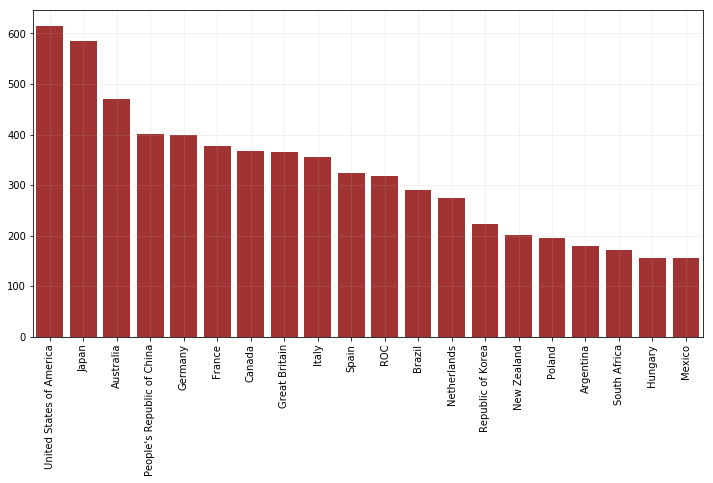

In [97]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_athletes.groupby('NOC').count().sort_values('Discipline')['Name'].sort_values(ascending=False)[:20].index,
            df_athletes.groupby('NOC').count().sort_values('Discipline')['Name'].sort_values(ascending=False)[:20],
        color='darkred', alpha=.8
        )
plt.xticks(range(20), 
           df_athletes.groupby('NOC').count().sort_values('Discipline')['Name'].sort_values(ascending=False)[:20].index.tolist(), 
           rotation=90)
plt.xlim([-.5, 19.5])
plt.grid(True, alpha=.2)
plt.show()

Lastly, the `unique()` method gives us all the unique strings in the column selected:

In [47]:
df_athletes['NOC'].unique()

array(['Norway', 'Spain', 'Italy', 'France', 'Chile', 'Sudan',
       'Islamic Republic of Iran', 'Azerbaijan', 'Netherlands',
       'Australia', 'United States of America', 'Qatar', 'Egypt',
       'Belgium', 'Malaysia', 'Singapore', 'Maldives', 'Saudi Arabia',
       'Germany', 'Uzbekistan', 'Indonesia', 'Kazakhstan', 'Bahrain',
       'Japan', 'Ethiopia', 'Canada', 'Malta', 'Sri Lanka', 'Morocco',
       'Austria', 'Mauritania', 'ROC', 'Libya', 'Nauru', 'Switzerland',
       'South Africa', 'Guyana', 'Georgia', 'Portugal', 'Jordan',
       'Palestine', 'India', 'Cyprus', 'Nigeria', 'Tunisia', 'Mexico',
       'Colombia', 'El Salvador', 'Romania', 'Poland',
       'Federated States of Micronesia', 'Brazil', 'Turkey', 'Sweden',
       'Great Britain', 'Hungary', 'Lithuania', 'Puerto Rico', 'Angola',
       'Congo', 'Monaco', 'Rwanda', 'Kenya', 'Armenia', 'Samoa',
       'Brunei Darussalam', 'Bangladesh', 'Benin', "Côte d'Ivoire",
       'Trinidad and Tobago', "People's Republic of Ch

These are all the countries there are in this dataset. We can select the countries desired in the dataset by:

In [51]:
list_of_countries_desired = ['Andorra', 'Spain', 'France', 'Germany']

df_athletes[df_athletes['NOC'].isin(list_of_countries_desired)]

Name      NOC           Discipline
1                 ABAD Nestor    Spain  Artistic Gymnastics
3              ABALDE Alberto    Spain           Basketball
4               ABALDE Tamara    Spain           Basketball
5                   ABALO Luc   France             Handball
34     ABDULJABBAR Ammar Riad  Germany               Boxing
...                       ...      ...                  ...
10985               ZEZE Ryan   France            Athletics
11057        ZIMMERMANN Sonja  Germany               Hockey
11073        ZUBIMENDI Martin    Spain             Football
11078        ZVEREV Alexander  Germany               Tennis
11080   ZWICKER Martin Detlef  Germany               Hockey

[1103 rows x 3 columns]

And then make a barchart of these:

In [52]:
df_athletes_from_selected_countries = df_athletes[df_athletes['NOC'].isin(list_of_countries_desired)]

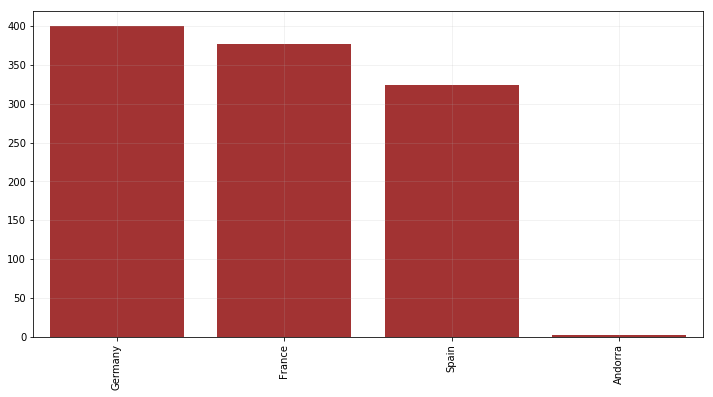

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_athletes_from_selected_countries.groupby('NOC').count().sort_values('Discipline')['Name'].sort_values(ascending=False).index,
            df_athletes_from_selected_countries.groupby('NOC').count().sort_values('Discipline')['Name'].sort_values(ascending=False),
        color='darkred', alpha=.8
        )
plt.xticks(range(20), 
           df_athletes_from_selected_countries.groupby('NOC').count().sort_values('Discipline')['Name'].sort_values(ascending=False).index.tolist(), 
           rotation=90)
plt.xlim([-.5, 3.5])
plt.grid(True, alpha=.2)
plt.show()

# Intro to Plotly

All the above code shows how to use Matplotlib. These plots are great and easy to generate and manipulate. However, Plotly provides a nice but a little bit harder way to do them. The plots from Plotly are interactive, and thus can be probably be of interest in many cases. You might be interested in doing these in the future:

Since we are running this in local on a Jupyter Notebook, we need to use plotly.offline.

In [107]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.express as px

Now we can do the same as above, but with interactive visualizations!

Let's first show the table:

In [34]:
import chart_studio.plotly as py
import plotly.figure_factory as ff

table = ff.create_table(df_medals)
pyo.iplot(table, filename='jupyter-table1')

Now we want to do a histogram:

In [47]:
fig = px.histogram(df_medals, x="Total", nbins=120)
fig.show()

We can do the same scatterplot as above:

In [35]:
fig = px.scatter(df_medals, x="Gold", y="Silver")
fig.show()

Now we want to do a boxplot using plotly.express:

In [41]:
fig = px.box(df_medals, y="Total")
fig.show()

And there are so many other plots we can do, for example, this interactive barplot showing the number of medals per Country:

In [37]:
import chart_studio.plotly as py
import plotly.graph_objects as go

data = [go.Bar(x=df_medals['Team/NOC'],
            y=df_medals.Total)]

pyo.iplot(data, filename='jupyter-basic_bar')


# Exercise 4:

Now use the sorted grouped count of athletes by country and generate your own first plotly barchart using the above cell as the base. Notice that data should be passed as a list, where the objects in the list are `go.Bar()` objects.

It should look like this:

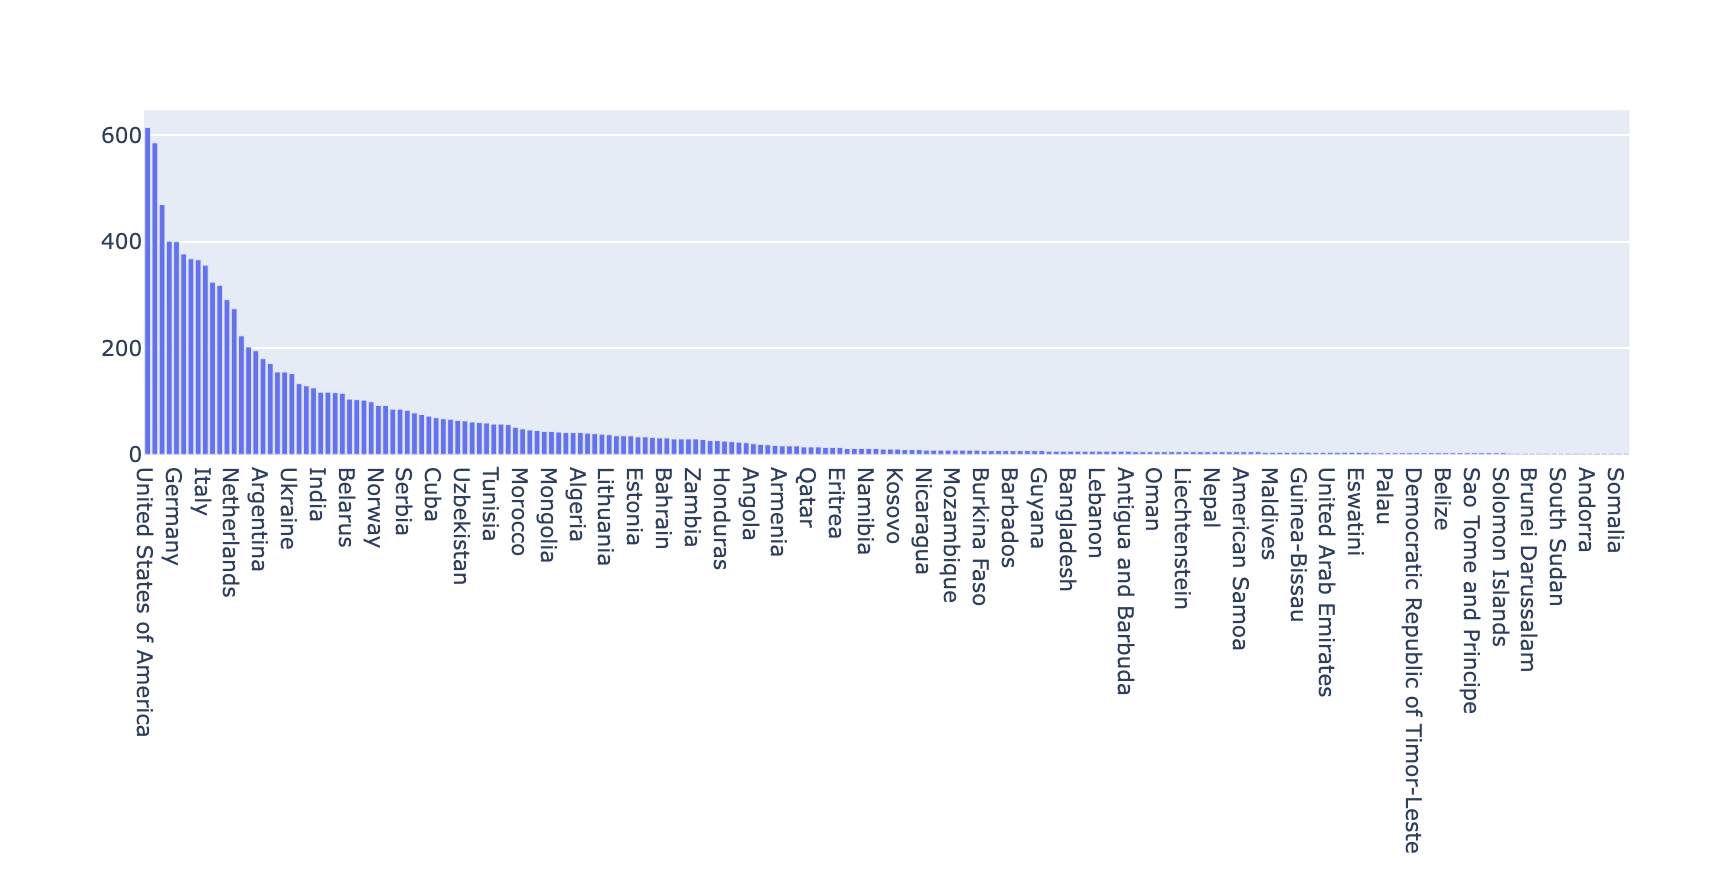

And that's it for today's lesson! You can always come back and see how we did all these figures!